## Regression Plots

In [6]:
%matplotlib inline

In [7]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


plt.rc('figure', figsize=(16,8))
plt.rc('font', size=14)  # the rc stands for runtime configuration parameters. These parameters are also known as rc parameters or rc settings. they control the look and feel of Maplotlib plots, such as the figure size, line width, color, and style, axes, axis and grid properties, text and font properties, and so on.




In [8]:
# Load the duncan's prestige dataset

prestige = sm.datasets.get_rdataset('Duncan', 'carData', cache=True).data
prestige.head(), prestige.shape

(            type  income  education  prestige
 rownames                                     
 accountant  prof      62         86        82
 pilot       prof      72         76        83
 architect   prof      75         92        90
 author      prof      55         90        76
 chemist     prof      64         86        90,
 (45, 4))

In [9]:
prestige_model = ols('prestige ~ income + education', data=prestige).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.65e-17
Time:                        13:43:36   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

## Influence plots

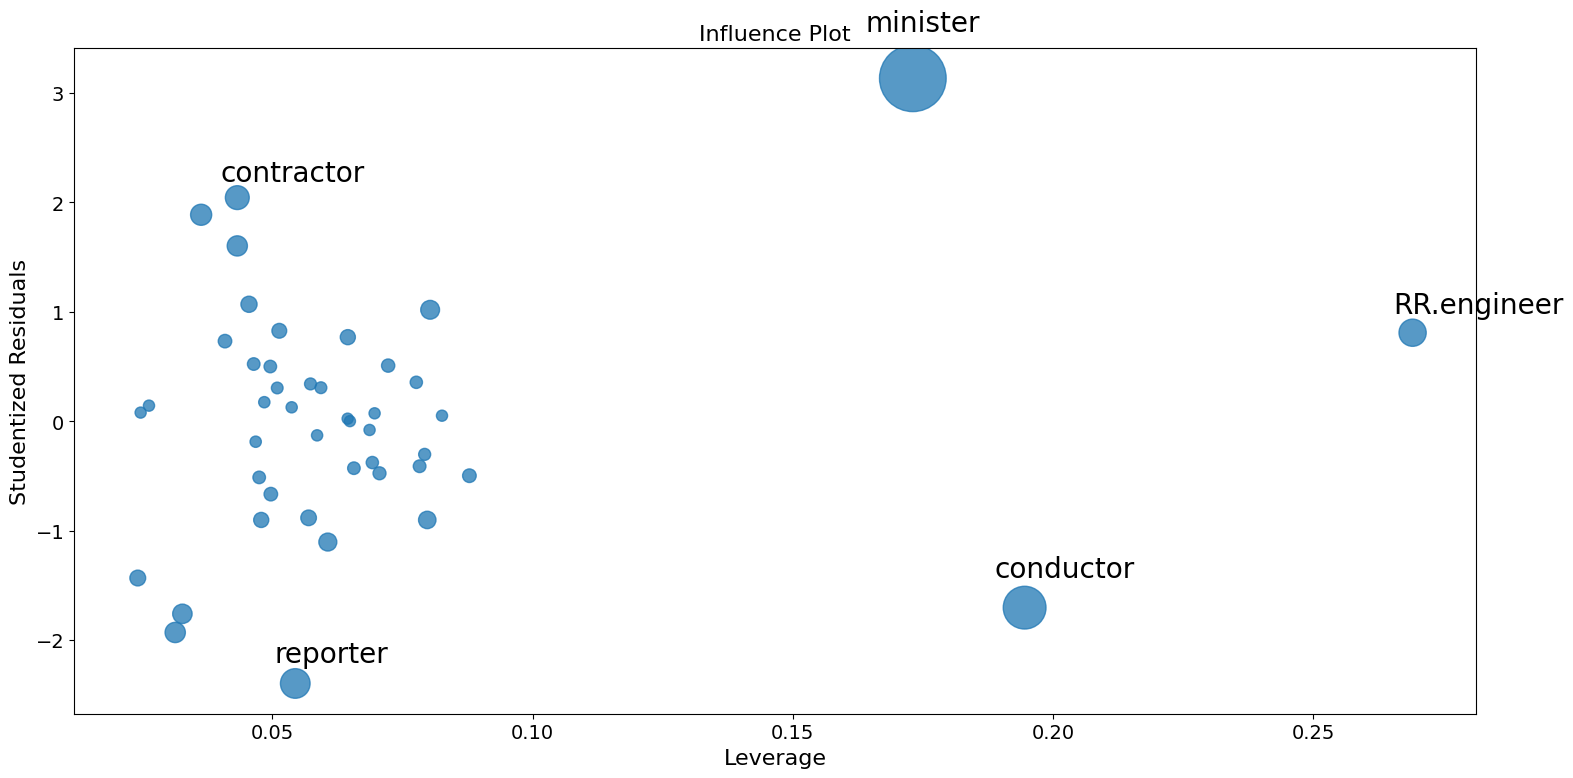

In [11]:
# Influence plots show the externally studentized residuals vs the leverage of each observation as measured by the hat matrix

fig = sm.graphics.influence_plot(prestige_model, criterion='cooks')
fig.tight_layout(pad=1.0)



#observations being both contractor and reporter have low leverage but a large residual. RR engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and therefor large influence.






## Partial Regression Plots (Duncan)

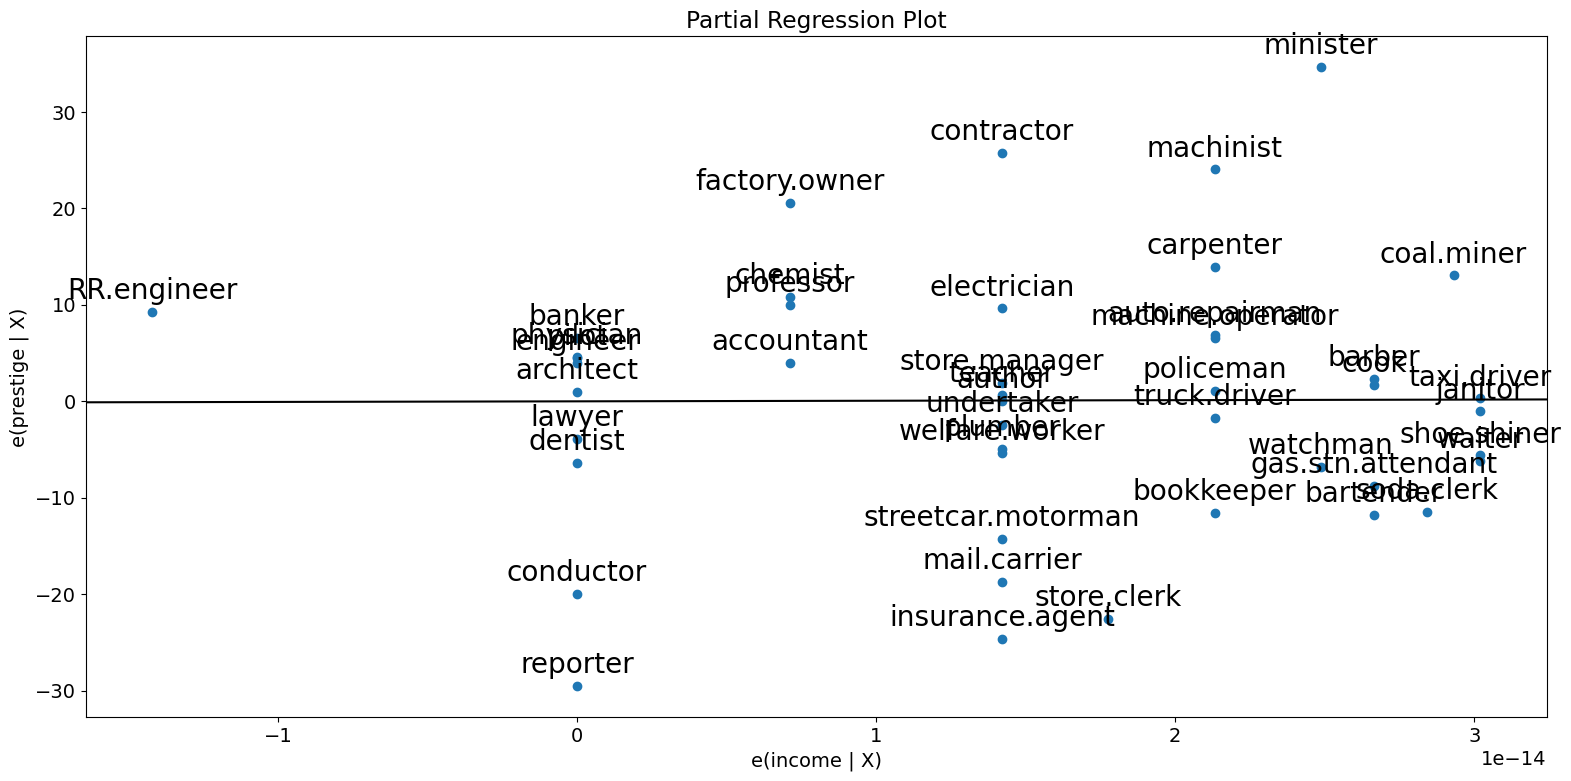

In [13]:
fig = sm.graphics.plot_partregress(
    "prestige", "income", ["income", "education"], data=prestige
)

fig.tight_layout(pad=1.0)

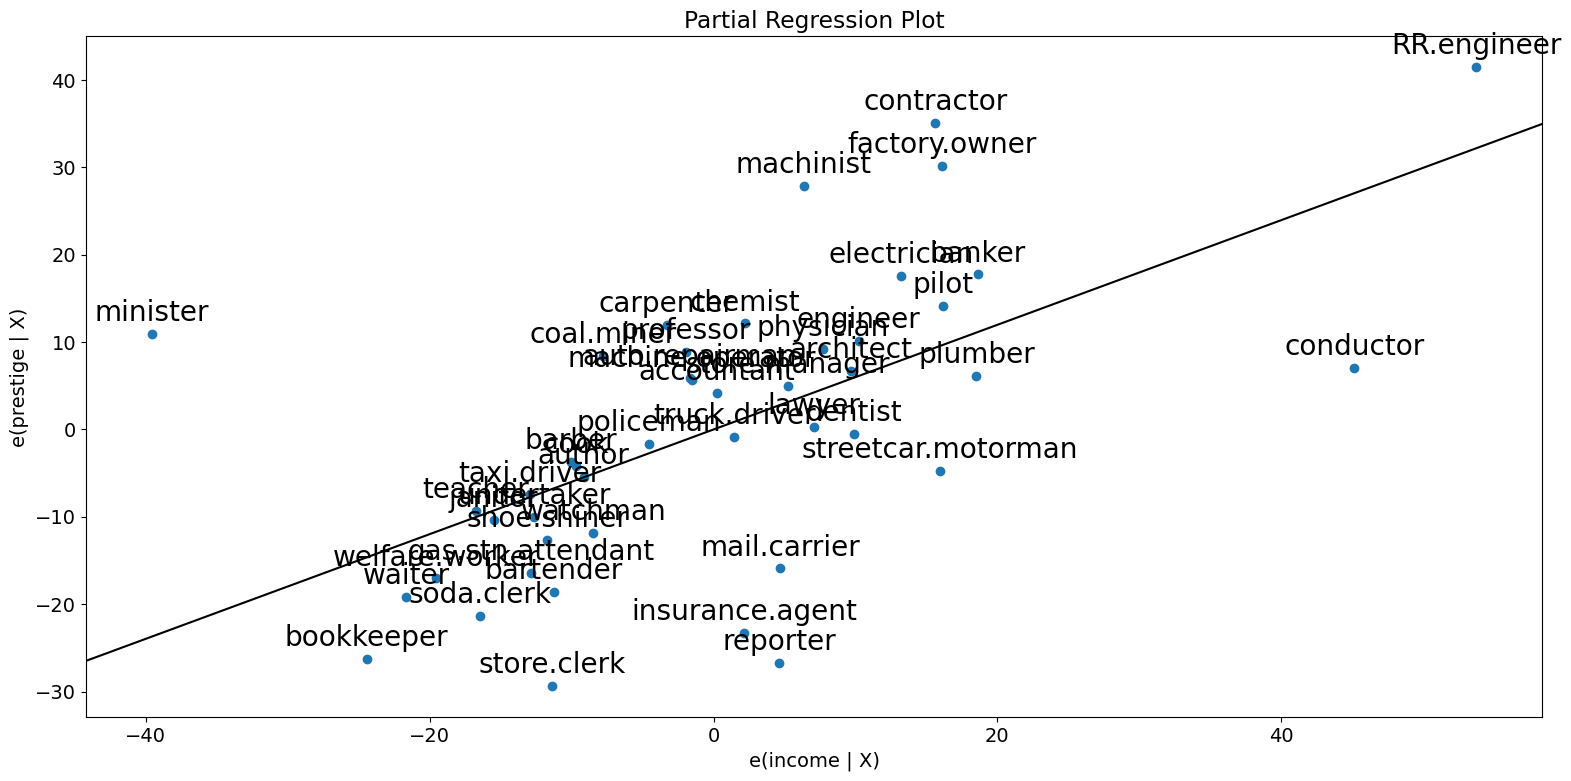

In [14]:
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige)
fig.tight_layout(pad=1.0)


In [ ]:
# As you can see the partial regression plot confirms the influence of conductor, minister and RR.engineer on the partial relationship between income and prestige. The cases greatly decreases the effect of income on prestige. Dropping these cases confirms this.

In [17]:
prestige.index.isin

<bound method Index.isin of Index(['accountant', 'pilot', 'architect', 'author', 'chemist', 'minister',
       'professor', 'dentist', 'reporter', 'engineer', 'undertaker', 'lawyer',
       'physician', 'welfare.worker', 'teacher', 'conductor', 'contractor',
       'factory.owner', 'store.manager', 'banker', 'bookkeeper',
       'mail.carrier', 'insurance.agent', 'store.clerk', 'carpenter',
       'electrician', 'RR.engineer', 'machinist', 'auto.repairman', 'plumber',
       'gas.stn.attendant', 'coal.miner', 'streetcar.motorman', 'taxi.driver',
       'truck.driver', 'machine.operator', 'barber', 'bartender',
       'shoe.shiner', 'cook', 'soda.clerk', 'watchman', 'janitor', 'policeman',
       'waiter'],
      dtype='object', name='rownames')>